In [53]:
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.decomposition import PCA
from collections import Counter

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score

import matplotlib.pyplot as plt

### Load Data

In [123]:
clean_df = pd.read_csv('Data/clean_data.csv')
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3153 entries, 0 to 3152
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            3153 non-null   int64  
 1   budget                3153 non-null   int64  
 2   genres                3153 non-null   object 
 3   keywords              3153 non-null   object 
 4   original_language     3153 non-null   object 
 5   original_title        3153 non-null   object 
 6   overview              3153 non-null   object 
 7   popularity            3153 non-null   float64
 8   production_companies  3153 non-null   object 
 9   production_countries  3153 non-null   object 
 10  release_date          3153 non-null   object 
 11  revenue               3153 non-null   int64  
 12  runtime               3153 non-null   float64
 13  spoken_languages      3153 non-null   object 
 14  status                3153 non-null   object 
 15  title                

### Prepare Feature

In [190]:
# Initialize the TF-IDF vectorizer
vectorizer = TfidfVectorizer(stop_words='english')

y = clean_df['profitable']  # Target variable

feature1 = clean_df['genres'].apply(lambda gs: ' - '.join([g['name'] for g in eval(gs)]))
feature2 = clean_df['keywords'].apply(lambda ks: ' - '.join([k['name'] for k in eval(ks)]))
feature3 = clean_df['overview']
feature4 = clean_df['cast'].apply(lambda cs: ' - '.join([c['name'] for c in eval(cs)]))

# Fit and transform the textual features to TF-IDF vectors
X = np.zeros((len(clean_df), 0))
for i in range(1, 2):
    feature = eval(f'feature{i}')
    f = vectorizer.fit_transform(feature).toarray()
    f = PCA(n_components=20).fit_transform(f)
    f = SelectKBest(f_classif, k=10).fit_transform(f, y)
    X = np.concatenate((X, f), axis=1)
    print(X.shape)

print(X.shape, y.shape)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0, stratify=y)

print("Class distribution in training set:")
print(Counter(y_train))

print("Class distribution in test set:")
print(Counter(y_test))

(3153, 10)
(3153, 10) (3153,)
Class distribution in training set:
Counter({True: 1385, False: 1295})
Class distribution in test set:
Counter({True: 244, False: 229})


### Train Model

In [191]:
# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Accuracy on train data
y_pred = model.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
precision = precision_score(y_train, y_pred)
recall = recall_score(y_train, y_pred)
f1 = f1_score(y_train, y_pred)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

Accuracy: 0.5929104477611941
Precision: 0.5924528301886792
Recall: 0.68014440433213
F1-Score: 0.6332773109243698


### Test Model

Accuracy: 0.5644820295983086
Precision: 0.5683453237410072
Recall: 0.6475409836065574
F1-Score: 0.6053639846743296


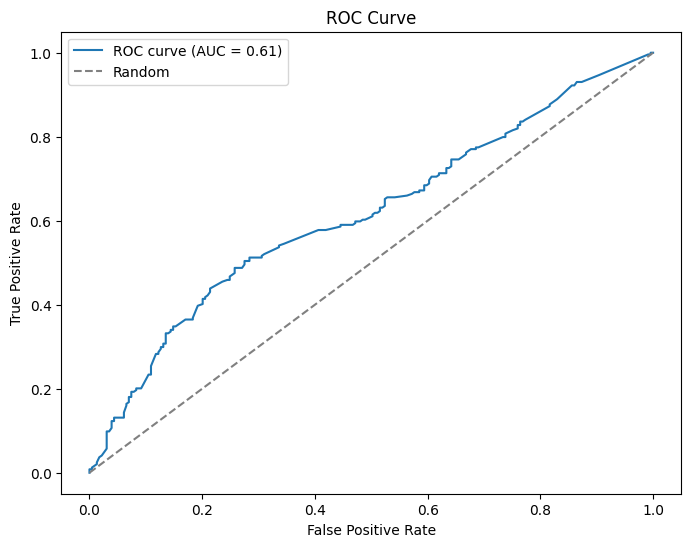

In [192]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

# Make predictions on the test set
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability of class 1 (positive class)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()